In [16]:
import os
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
import torchvision

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm.notebook import tqdm_notebook

In [17]:
import random
import numpy as np
import torch

# Setting the seed for Python's built-in random module
random.seed(42)

# Setting the seed for numpy's random number generator
np.random.seed(42)

# Setting the seed for PyTorch (both CPU and GPU)
torch.manual_seed(2147483647)

# If using CUDA, set the seed for all GPUs
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(2147483647)

# Ensuring deterministic behavior in PyTorch
torch.use_deterministic_algorithms(True)

# Optionally, set the environment variable for deterministic behavior in cuDNN
import os
os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8'

# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Select the device
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print("Device:", device)


Device: cpu


In [18]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define preprocessing transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

# Download and prepare the MNIST dataset
mnist_train_val = torchvision.datasets.MNIST(
    root='datasets/mnist', train=True, transform=transform, download=True)
mnist_test = torchvision.datasets.MNIST(
    root='datasets/mnist', train=False, transform=transform, download=True)

# Split the training dataset into training and validation sets
train_size = 50000
val_size = len(mnist_train_val) - train_size
train_subset, val_subset = torch.utils.data.random_split(mnist_train_val, [train_size, val_size])

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_subset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_subset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=32, shuffle=False)

# Print the sizes of the datasets to verify
print(f'Training set size: {len(train_subset)}')
print(f'Validation set size: {len(val_subset)}')
print(f'Test set size: {len(mnist_test)}')


Training set size: 50000
Validation set size: 10000
Test set size: 10000


In [19]:
import torch
import torchvision

# Function to print dimensions of images and labels in the data loader
def check_loader_dimensions(loaders):
    for name, loader in loaders.items():
        num_samples = len(loader.dataset)
        data_iter = iter(loader)
        images, labels = next(data_iter)
        print(f'Loader: {name}')
        print(f'Number of samples: {num_samples}')
        print(f'Image batch shape: {images.shape}')
        print(f'Label batch shape: {labels.shape}')
        print('------------------------')

# Define preprocessing transformations
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])

# Download and prepare the MNIST dataset
mnist_train_val = torchvision.datasets.MNIST(
    root='datasets/mnist', train=True, transform=transform, download=True)
mnist_test = torchvision.datasets.MNIST(
    root='datasets/mnist', train=False, transform=transform, download=True)

# Split the training dataset into training and validation sets
train_size = 50000
val_size = len(mnist_train_val) - train_size
train_subset, val_subset = torch.utils.data.random_split(mnist_train_val, [train_size, val_size])

# Create data loaders
loaders = {
    'train_loader': torch.utils.data.DataLoader(train_subset, batch_size=32, shuffle=True),
    'val_loader': torch.utils.data.DataLoader(val_subset, batch_size=32, shuffle=False),
    'test_loader': torch.utils.data.DataLoader(mnist_test, batch_size=32, shuffle=False)
}

# Check and print dimensions
check_loader_dimensions(loaders)


Loader: train_loader
Number of samples: 50000
Image batch shape: torch.Size([32, 1, 28, 28])
Label batch shape: torch.Size([32])
------------------------
Loader: val_loader
Number of samples: 10000
Image batch shape: torch.Size([32, 1, 28, 28])
Label batch shape: torch.Size([32])
------------------------
Loader: test_loader
Number of samples: 10000
Image batch shape: torch.Size([32, 1, 28, 28])
Label batch shape: torch.Size([32])
------------------------


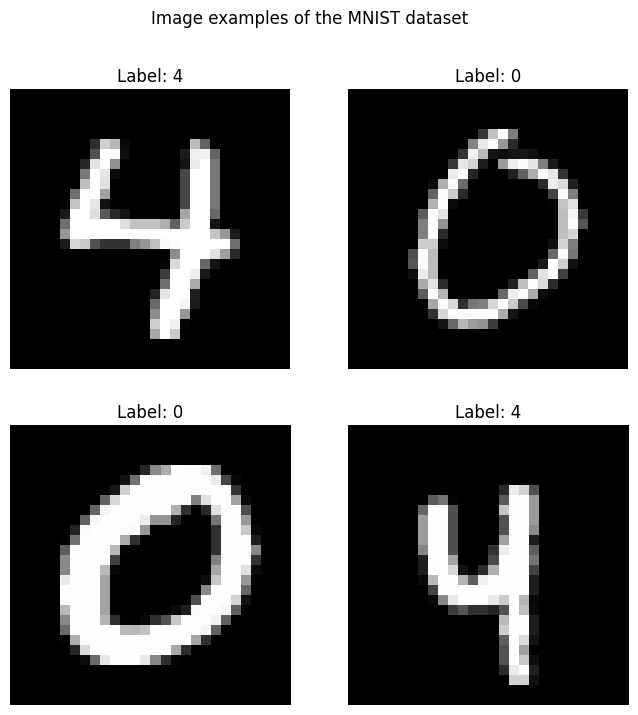

In [20]:
import torch
import torchvision
import matplotlib.pyplot as plt

# Define preprocessing transformations
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])

# Download and prepare the MNIST dataset
mnist_train_val = torchvision.datasets.MNIST(
    root='datasets/mnist', train=True, transform=transform, download=True)
mnist_test = torchvision.datasets.MNIST(
    root='datasets/mnist', train=False, transform=transform, download=True)

# Split the training dataset into training and validation sets
train_size = 50000
val_size = len(mnist_train_val) - train_size
train_subset, val_subset = torch.utils.data.random_split(mnist_train_val, [train_size, val_size])

# Visualize examples
def visualize_examples(dataset, num_images=4):
    plt.figure(figsize=(8, 8))
    for i in range(num_images):
        image, label = dataset[i]
        image = image.squeeze().numpy()

        plt.subplot(2, 2, i + 1)
        plt.title(f'Label: {label}')
        plt.imshow(image, cmap='gray')
        plt.axis('off')

    plt.suptitle("Image examples of the MNIST dataset")
    plt.show()

# Visualize examples from the validation set
visualize_examples(val_subset)


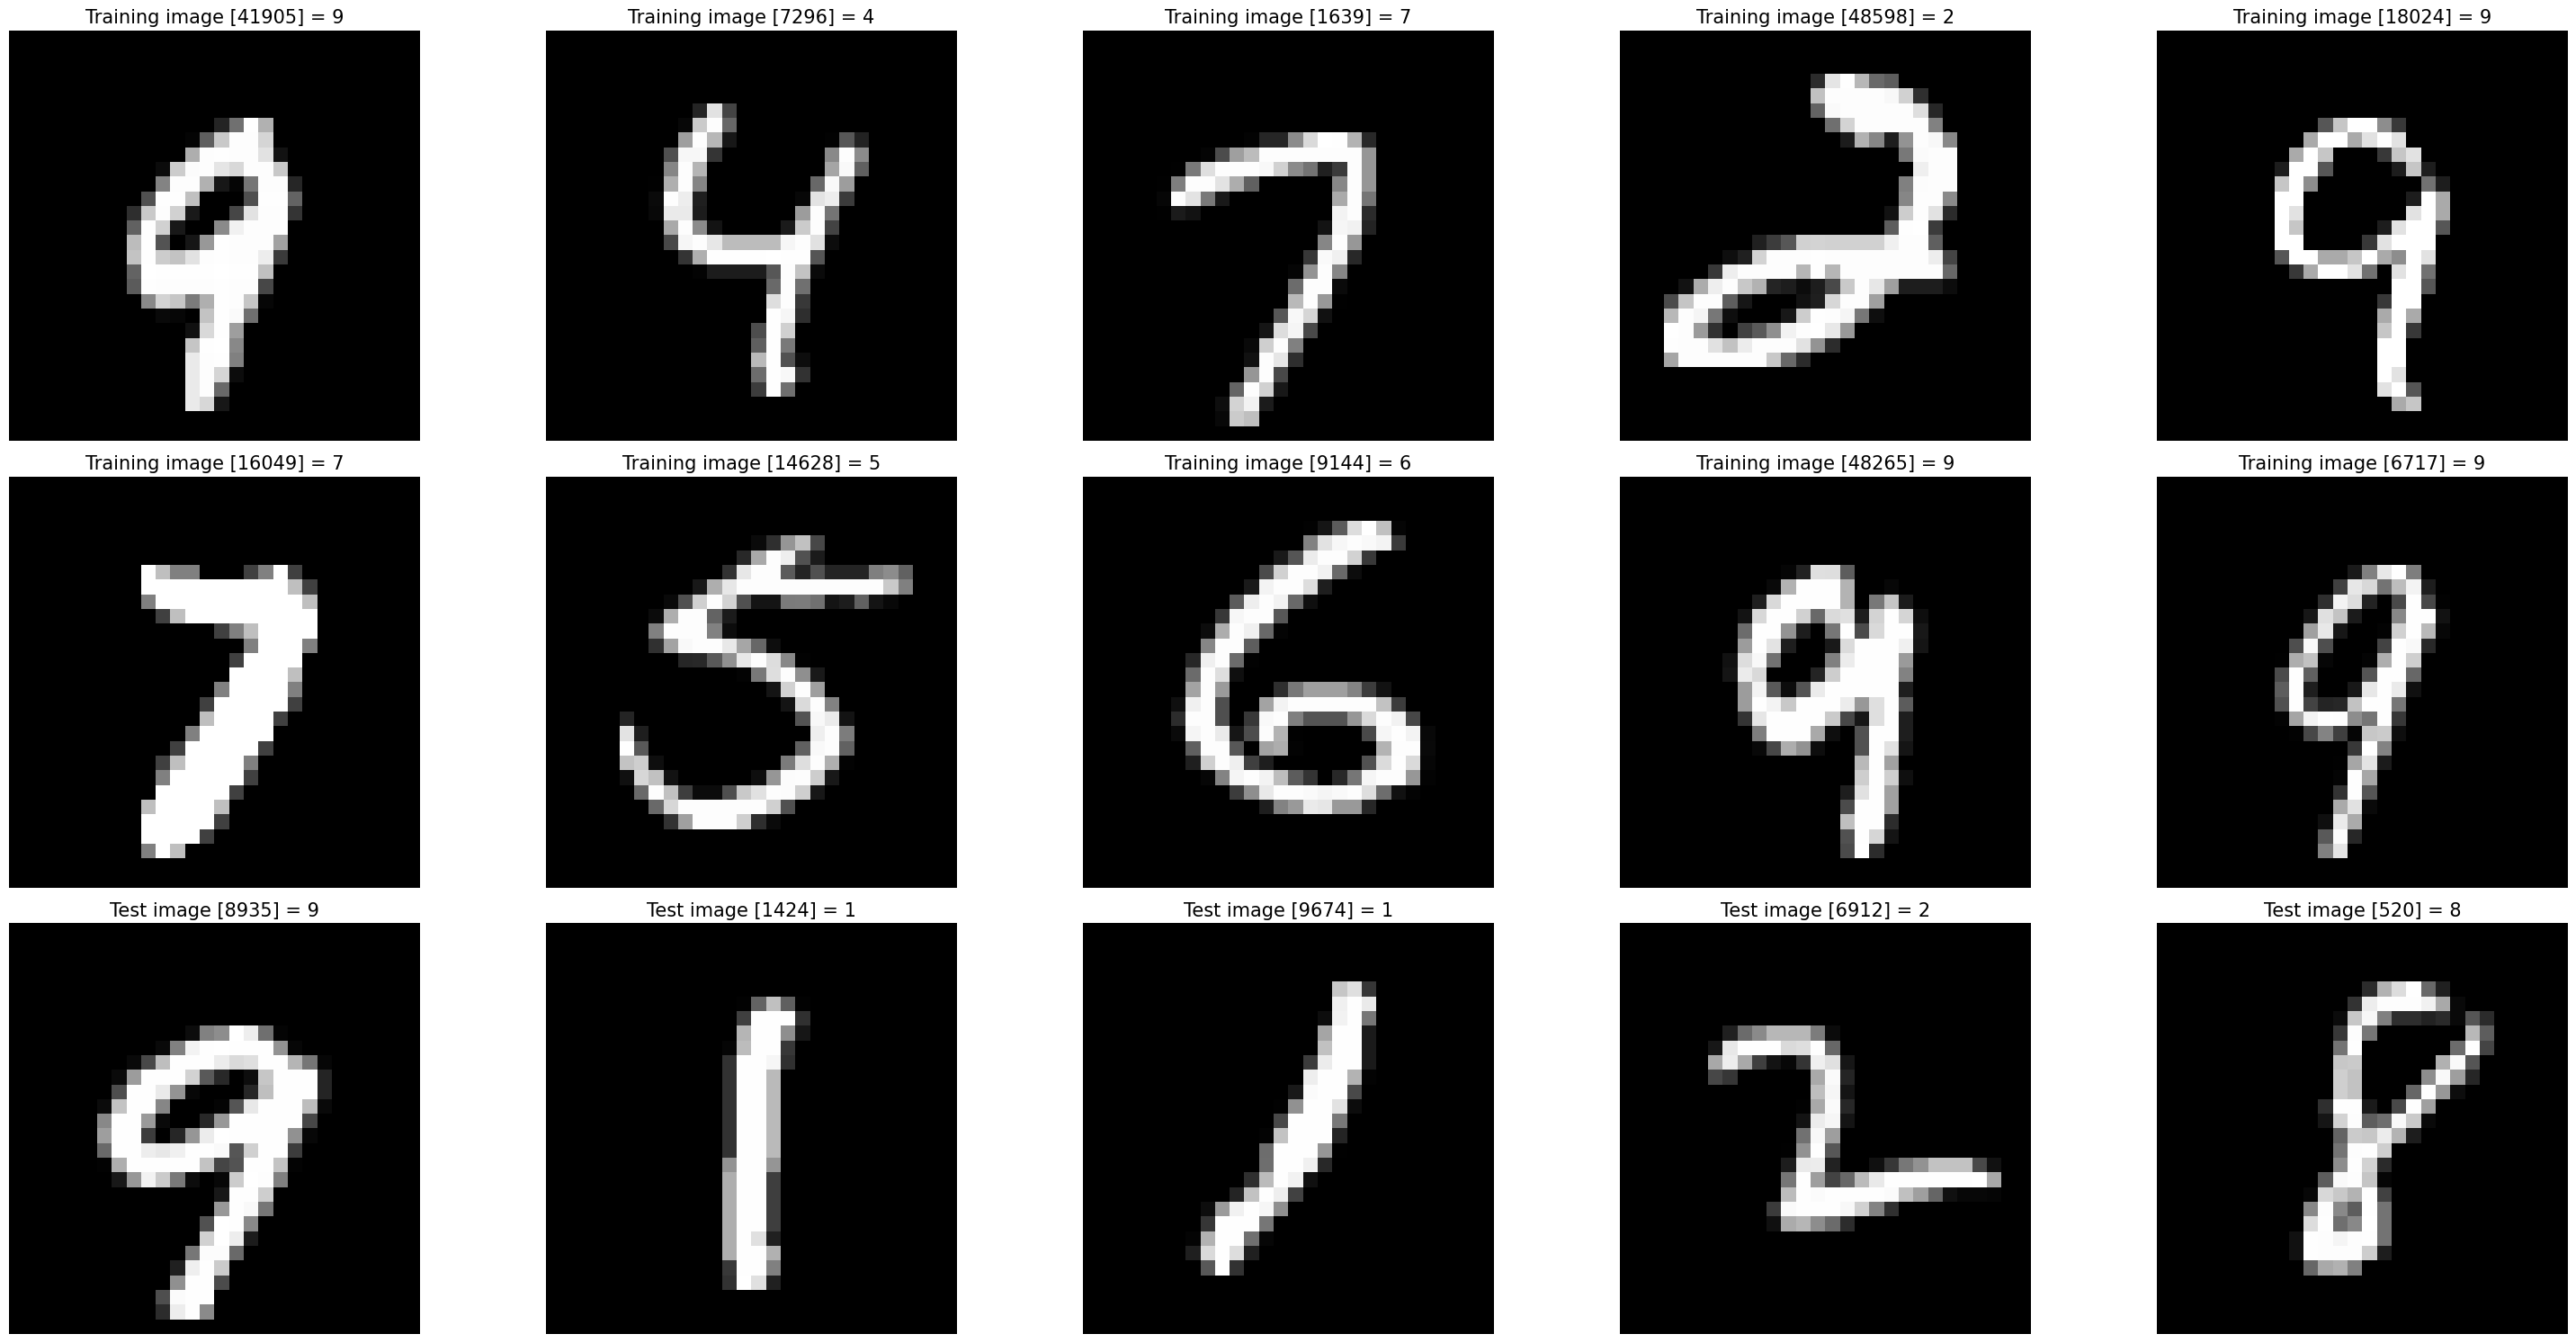

In [21]:
import random
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define transformations to be applied to the images
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image or numpy.ndarray to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Load MNIST training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Select random images and their labels from the datasets
images_2_show = []
titles_2_show = []

# Randomly select from training set
for _ in range(10):
    idx = random.randint(0, len(train_dataset)-1)
    image, label = train_dataset[idx]
    images_2_show.append(image)
    titles_2_show.append(f'Training image [{idx}] = {label}')

# Randomly select from test set
for _ in range(5):
    idx = random.randint(0, len(test_dataset)-1)
    image, label = test_dataset[idx]
    images_2_show.append(image)
    titles_2_show.append(f'Test image [{idx}] = {label}')

# Plotting the images
cols = 5
rows = (len(images_2_show) // cols) + 1
plt.figure(figsize=(30, 20))
for i, (image, title) in enumerate(zip(images_2_show, titles_2_show), 1):
    plt.subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(title, fontsize=15)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [22]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define transformations to be applied to the images
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image or numpy.ndarray to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Load MNIST training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Reshape the images and labels for training and testing
X_train = train_dataset.data.reshape(len(train_dataset), -1).float() / 255.0  # Flatten and normalize
y_train = train_dataset.targets

X_test = test_dataset.data.reshape(len(test_dataset), -1).float() / 255.0  # Flatten and normalize
y_test = test_dataset.targets

# Optionally, convert labels to numpy arrays if needed
y_train = y_train.numpy()
y_test = y_test.numpy()

# Print shapes for verification
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: torch.Size([60000, 784]), y_train shape: (60000,)
X_test shape: torch.Size([10000, 784]), y_test shape: (10000,)


In [23]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# Step 1: Define the Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # 10 classes for MNIST digits

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Step 2: Prepare Data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image or numpy.ndarray to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Load MNIST training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Define data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Step 3: Train the Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = NeuralNetwork().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss / len(train_loader)}")

# Test loop
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Accuracy on test set: {(100 * correct / total):.2f}%")

# Train and evaluate the model
train(model, train_loader, criterion, optimizer)
test(model, test_loader)


Epoch [1/5], Loss: 0.37602978905063195
Epoch [2/5], Loss: 0.19056650190782953
Epoch [3/5], Loss: 0.1370904847348073
Epoch [4/5], Loss: 0.11059563036666496
Epoch [5/5], Loss: 0.0942705007759469
Accuracy on test set: 96.75%


In [24]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load MNIST dataset using torchvision
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image or numpy.ndarray to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Step 2: Preprocess data for SVC
X_train = train_dataset.data.numpy().reshape(-1, 28*28) / 255.0  # Flatten and normalize
y_train = train_dataset.targets.numpy()

X_test = test_dataset.data.numpy().reshape(-1, 28*28) / 255.0  # Flatten and normalize
y_test = test_dataset.targets.numpy()

# Optionally, apply standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Initialize and train SVC model
model = SVC()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

# Optionally, print detailed classification report
print(classification_report(y_test, y_pred))


Accuracy on test set: 96.61%
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

